In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [55]:
from generate_means import regular_expectancy, new_expectancy, box_comp, MH
from distribution_classes import Simple_Gaussian, Banana_Gaussian

In [2]:
def box_comp(a, b):                                                    
    data = [a, b]                                             
    plt.figure(figsize=(12,8))                 
    plt.boxplot(data, showfliers = False, labels =                              
                ["Vanila sampling", "norm_flow"])
    plt.grid()
    plt.show()

In [3]:
data = pd.read_csv('bananaressev.csv')
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,max_amount of epochs,func_id,MC Vanila,norm_flow,learned_d
0,0,0.0001,3,3,maf,20000,0,"[0.029999999329447746, 0.035999998450279236, 0...","[0.030741021037101746, 0.027118127793073654, 0...","[[26.272520065307617, 5.903081893920898], [21...."
1,1,0.0001,3,3,maf,20000,0,"[0.026000000536441803, 0.02800000086426735, 0....","[0.0266557764261961, 0.030194535851478577, 0.0...","[[17.09883689880371, 1.8363807201385498], [21...."
2,2,0.0001,3,3,maf,20000,0,"[0.03200000151991844, 0.03400000184774399, 0.0...","[0.032145384699106216, 0.0270144771784544, 0.0...","[[25.882789611816406, 5.4169464111328125], [14..."
3,0,0.0001,3,3,maf,20000,1,"[1.060489535331726, 1.1669687032699585, 1.0410...","[1.058929204940796, 1.019544243812561, 1.06486...","[[-31.409767150878906, 9.406499862670898], [-7..."
4,1,0.0001,3,3,maf,20000,1,"[1.1370677947998047, 0.973185122013092, 1.1013...","[1.4692801237106323, 1.0709648132324219, 1.101...","[[-6.569482803344727, -0.7987641096115112], [-..."


In [4]:
data.shape

(54, 10)

In [5]:
data.dtypes

test n                    int64
learning rate           float64
layer amount              int64
hidden layer size         int64
flow type                object
max_amount of epochs      int64
func_id                   int64
MC Vanila                object
norm_flow                object
learned_d                object
dtype: object

In [6]:
def transf(s):
    s = s.replace('[', '')
    s = s.replace(']', '')
    s = s.split(',')
    return s

def transf_double(s):
    ans = []
    s = s.split('],')
    for el in s:
        el = el.replace('[', '')
        el = el.replace(']', '')
        x, y = el.split(',')
        ans.append([float(x), float(y)])
    return ans

nums = list()
reg = list()
ld = []
for i in range(data.shape[0]):
    mystr = data['norm_flow'].iloc[i]
    mystr = transf(mystr)
    if mystr[0] != 'nan':
        nums.append(np.array(list(map(float, mystr))))
        kek = transf(data.iloc[i]['MC Vanila'])
        reg.append(np.array(list(map(float, kek))))
        ld.append(transf_double(data.iloc[i]['learned_d']))
    else:
        nums.append(np.nan)
        reg.append(np.nan)
data['fl'] = nums
data['mc'] = reg
data['distr'] = ld
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,max_amount of epochs,func_id,MC Vanila,norm_flow,learned_d,fl,mc,distr
0,0,0.0001,3,3,maf,20000,0,"[0.029999999329447746, 0.035999998450279236, 0...","[0.030741021037101746, 0.027118127793073654, 0...","[[26.272520065307617, 5.903081893920898], [21....","[0.030741021037101746, 0.027118127793073654, 0...","[0.029999999329447746, 0.035999998450279236, 0...","[[26.272520065307617, 5.903081893920898], [21...."
1,1,0.0001,3,3,maf,20000,0,"[0.026000000536441803, 0.02800000086426735, 0....","[0.0266557764261961, 0.030194535851478577, 0.0...","[[17.09883689880371, 1.8363807201385498], [21....","[0.0266557764261961, 0.030194535851478577, 0.0...","[0.026000000536441803, 0.02800000086426735, 0....","[[17.09883689880371, 1.8363807201385498], [21...."
2,2,0.0001,3,3,maf,20000,0,"[0.03200000151991844, 0.03400000184774399, 0.0...","[0.032145384699106216, 0.0270144771784544, 0.0...","[[25.882789611816406, 5.4169464111328125], [14...","[0.032145384699106216, 0.0270144771784544, 0.0...","[0.03200000151991844, 0.03400000184774399, 0.0...","[[25.882789611816406, 5.4169464111328125], [14..."
3,0,0.0001,3,3,maf,20000,1,"[1.060489535331726, 1.1669687032699585, 1.0410...","[1.058929204940796, 1.019544243812561, 1.06486...","[[-31.409767150878906, 9.406499862670898], [-7...","[1.058929204940796, 1.019544243812561, 1.06486...","[1.060489535331726, 1.1669687032699585, 1.0410...","[[-31.409767150878906, 9.406499862670898], [-7..."
4,1,0.0001,3,3,maf,20000,1,"[1.1370677947998047, 0.973185122013092, 1.1013...","[1.4692801237106323, 1.0709648132324219, 1.101...","[[-6.569482803344727, -0.7987641096115112], [-...","[1.4692801237106323, 1.0709648132324219, 1.101...","[1.1370677947998047, 0.973185122013092, 1.1013...","[[-6.569482803344727, -0.7987641096115112], [-..."


In [7]:
data['layer amount'].value_counts()

3     18
9     18
15    18
Name: layer amount, dtype: int64

In [8]:
data['fl'].isna().sum()

0

In [9]:
data.dropna(inplace=True)
data.shape

(54, 13)

In [10]:
data['fl_var'] = data['fl'].apply(np.var)
data.head(5)

,test n,learning rate,layer amount,hidden layer size,flow type,max_amount of epochs,func_id,MC Vanila,norm_flow,learned_d,fl,mc,distr,fl_var
0,0,0.0001,3,3,maf,20000,0,"[0.029999999329447746, 0.035999998450279236, 0...","[0.030741021037101746, 0.027118127793073654, 0...","[[26.272520065307617, 5.903081893920898], [21....","[0.030741021037101746, 0.027118127793073654, 0...","[0.029999999329447746, 0.035999998450279236, 0...","[[26.272520065307617, 5.903081893920898], [21....",0.000019
1,1,0.0001,3,3,maf,20000,0,"[0.026000000536441803, 0.02800000086426735, 0....","[0.0266557764261961, 0.030194535851478577, 0.0...","[[17.09883689880371, 1.8363807201385498], [21....","[0.0266557764261961, 0.030194535851478577, 0.0...","[0.026000000536441803, 0.02800000086426735, 0....","[[17.09883689880371, 1.8363807201385498], [21....",0.000005
2,2,0.0001,3,3,maf,20000,0,"[0.03200000151991844, 0.03400000184774399, 0.0...","[0.032145384699106216, 0.0270144771784544, 0.0...","[[25.882789611816406, 5.4169464111328125], [14...","[0.032145384699106216, 0.0270144771784544, 0.0...","[0.03200000151991844, 0.03400000184774399, 0.0...","[[25.882789611816406, 5.4169464111328125], [14...",0.000005
3,0,0.0001,3,3,maf,20000,1,"[1.060489535331726, 1.1669687032699585, 1.0410...","[1.058929204940796, 1.019544243812561, 1.06486...","[[-31.409767150878906, 9.406499862670898], [-7...","[1.058929204940796, 1.019544243812561, 1.06486...","[1.060489535331726, 1.1669687032699585, 1.0410...","[[-31.409767150878906, 9.406499862670898], [-7...",0.007582
4,1,0.0001,3,3,maf,20000,1,"[1.1370677947998047, 0.973185122013092, 1.1013...","[1.4692801237106323, 1.0709648132324219, 1.101...","[[-6.569482803344727, -0.7987641096115112], [-...","[1.4692801237106323, 1.0709648132324219, 1.101...","[1.1370677947998047, 0.973185122013092, 1.1013...","[[-6.569482803344727, -0.7987641096115112], [-...",0.029967


In [11]:
data.sort_values(by='fl_var', inplace=True)

In [12]:
cnt = 0
for i in range(data.shape[0]):
    kek = data['mc'].iloc[i]
    mek = data['fl'].iloc[i]
    if np.var(kek) > np.var(mek):
        cnt += 1
cnt

16

[2 0.0001 9 3 'maf' 20000 0]
Baseline variance: 2.9265100810358693e-05
Variance of our approach: 1.1386288517602837e-05
Reduction rate: 2.5702054506273737


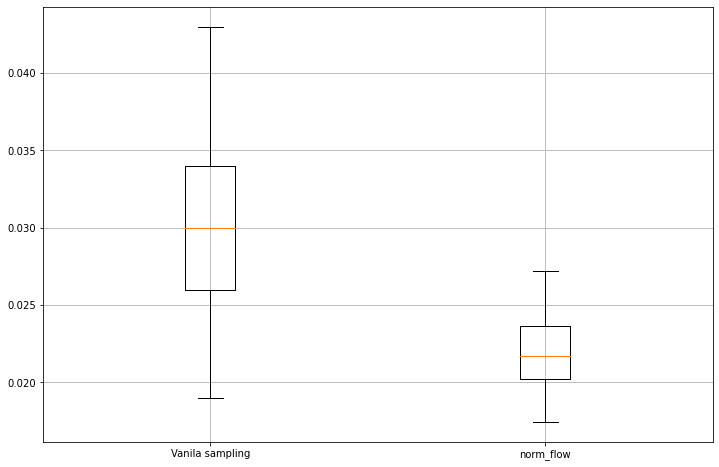

In [17]:
cnt = 0
for i in range(data.shape[0]):
    if cnt == 1:
        break
    kek = data['mc'].iloc[i]
    mek = data['fl'].iloc[i]
    if np.var(kek) > np.var(mek) and np.var(mek) > 1e-5:
        cnt += 1
        print(data.iloc[i][:'MC Vanila'].to_numpy()[:-1])
        van_var = np.var(kek)
        flow_var = np.var(mek)
        print("Baseline variance:", van_var)
        print("Variance of our approach:", flow_var)
        print("Reduction rate:", van_var/flow_var)
        box_comp(kek, mek)

In [56]:
"""
def func(x):
    #specifying h(x)
    return (x[:, 1] > 4).type(torch.float)

def func_sec(x):
    #specifying h(x)
    x1 = x[:, 0]
    x2 = x[:, 1] - b*x1**2 + p*b
    return (x1**2 + x2**2) * (x1**2/p + x2**2 > 3).type(torch.float)

p = 100
b = 0.01
p_dist = Banana_Gaussian(p, b)
samps = p_dist.sampler(1000)

test_amnt = 10
ans = []
for _ in range(test_amnt):
    smps = MH(func, p_dist.log_pdf, 10**3, 2)
    ans.append(torch.sign(func(smps)).mean())

""";

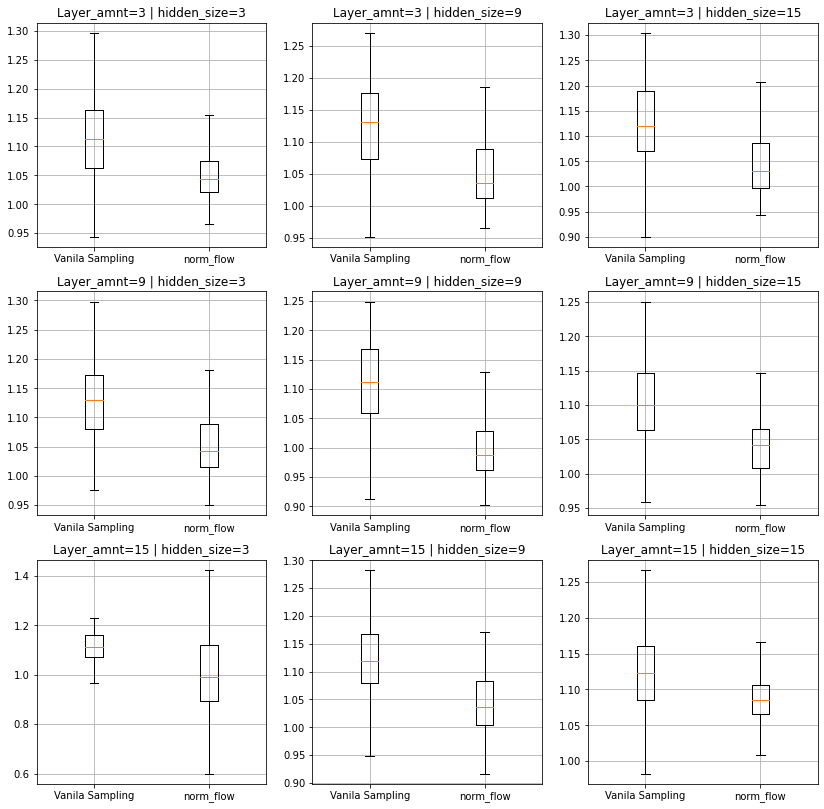

In [68]:
# see in what cases bias appears. supposedly, in every
plt.figure(figsize=(14, 14))
for i, ls in enumerate([3, 9, 15]):
    for j, hds in enumerate([3, 9, 15]):
        mc = None
        fl = None
        
        for k in range(0, data.shape[0]):
            curm = data['mc'].iloc[k]
            curf = data['fl'].iloc[k]
            if data['func_id'].iloc[k] == 1 and \
                 data['layer amount'].iloc[k] == ls \
                and data['hidden layer size'].iloc[k] == hds:
                dist = data['distr'].iloc[k]
                if dist == []:
                    continue
                if np.isnan(dist[0][0]):
                    continue
                mc = data['mc'].iloc[k]
                fl = data['fl'].iloc[k]
                break
    
        
        plt.subplot2grid((3, 3), (i, j))
        plt.grid()
        plt.title('Layer_amnt=' + str(ls) + ' | hidden_size=' + str(hds))
        if mc is None:
            continue
        ars = [mc, fl]                
        plt.boxplot(ars, showfliers = False, labels =                              
                    ["Vanila Sampling", "norm_flow"])
        

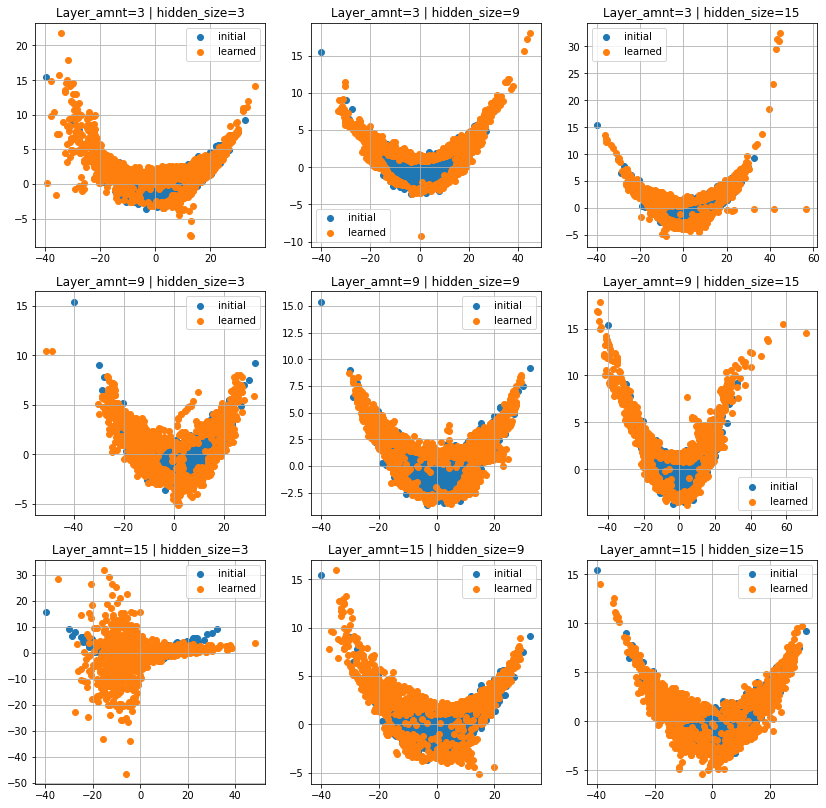

In [69]:
# see in what cases bias appears. supposedly, in every
plt.figure(figsize=(14, 14))
for i, ls in enumerate([3, 9, 15]):
    for j, hds in enumerate([3, 9, 15]):
        dist = []
        
        for k in range(0, data.shape[0]):
            curm = data['mc'].iloc[k]
            curf = data['fl'].iloc[k]
            if data['func_id'].iloc[k] == 1 and \
                data['layer amount'].iloc[k] == ls \
                and data['hidden layer size'].iloc[k] == hds:
                dist = data['distr'].iloc[k]
                if dist == []:
                    continue
                if np.isnan(dist[0][0]):
                    continue
                break
        if dist == []:
            continue
        dist = np.array(dist)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.grid()
        plt.title('Layer_amnt=' + str(ls) + ' | hidden_size=' + str(hds)) 
        plt.scatter(samps[:, 0], samps[:, 1], label = 'initial')
        plt.scatter(dist[:, 0], dist[:, 1], label = 'learned')
        plt.legend()
        